In [ ]:
# default_exp reporting

# Reporting and Visualization


Some Functionality for Reporting and Visualization 

In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
#export

import importlib
from collections import namedtuple
from box import Box

import numpy as np
from dataclasses import dataclass, field
import pandas as pd


import matplotlib
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt

from matplotlib.ticker import MaxNLocator

from IPython.display import display, Markdown

from personnel_scheduling.data_structures import *

## Display Rule Violations



**TODO: We should create a small example dummy example for an evaluation result.**

As long as this does not exist, we can only test it using the existing instance types (Demassey and Dahmen)

In [ ]:
#export

def display_evaluation_results(evaluation_result):
       
    if evaluation_result.is_feasible():
        display(Markdown(f'### Feasible Solution with objective: {evaluation_result.get_total_penalty():g}'))
    else:
        display(Markdown('### Solution is infeasible. Hard rule violations:'))
        display( evaluation_result.get_df_hard_rule_violations())
    
    display(Markdown('### Grouped Penalties:'))
    display(evaluation_result.get_df_grouped_penalties())

    
def display_detailed_penalties(evaluation_result):
    display(Markdown('### Detailed Penalties:'))
    display( evaluation_result.get_df_detailed_penalties())



## Visualizations

### Shift Schedules with Matplotlib


The functions below can be used to plot a shift schedule.

**TODOs:** 
- consider using something like Altair (https://altair-viz.github.io/index.html) where we can have an interactive chart where hovering over an activityblock (or shift) displays the cost associated with the activtiyblock (or shift).


In [ ]:
#export
def plot_activity_block(ax, shift_index, activity_block):
    
    color = 'lightgrey'
    
    start_period = activity_block.get_start_period()
    number_of_periods = activity_block.get_number_of_periods()
    
    if activity_block.is_work():
        color = matplotlib.cm.get_cmap('tab10')(int(activity_block.activity_type))
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'        
        ax.text(start_period + 0.5*number_of_periods, shift_index, str(activity_block.activity_type), ha='center', va='center', color=text_color, size='x-large',weight='bold')    
    
    
    ax.barh(shift_index, number_of_periods -0.1, left=start_period - 0.45, height=0.7, align='center', color = color, alpha = 0.7)
    


def plot_work_block(ax, shift_index, work_block):
    start_period = work_block.get_start_period()
    number_of_periods = work_block.get_number_of_periods()
    ax.barh(shift_index, number_of_periods, left=start_period - 0.5, height=0.8, align='center', edgecolor='darkgray', linewidth=2, fill = False, alpha = 1)
     

def plot_shift_schedule(shift_schedule, number_of_periods = None):
    
    if number_of_periods is None:
        number_of_periods = shift_schedule.get_number_of_periods()
        
    shift_schedule.get_number_of_periods()
    

    number_of_shifts =  shift_schedule.get_number_of_shifts()
    
    fig = plt.figure(figsize=(40,number_of_shifts))

    ax = fig.gca()

    plt.gca().invert_yaxis() 
    

    
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    
    ax.tick_params(axis="x", labelsize=16,bottom=False, labelbottom=True, labeltop=True)
    ax.tick_params(axis="y", labelsize=16,left=False, labelleft=True, labelright=True)

    ax.set_xticks(np.arange(0, number_of_periods+2.1, 2))
    ax.set_xticks(np.arange(-0.5,number_of_periods+2.5,1),minor=True)
    ax.set_yticks(np.arange(0.5, number_of_shifts+0.5,1),minor=True)
    ax.set_xlim(-0.5,number_of_periods+0.5 )
    ax.set_ylim(-0.5,number_of_shifts-0.5)

    plt.gca().invert_yaxis() 
    ax.grid(which='minor', alpha=0.6)
    
    
    for shift_index, shift in enumerate(shift_schedule.shifts):
        for activity_block in shift.activity_blocks:
            plot_activity_block(ax,shift_index,activity_block)    
            
 #   for shift_index, shift in enumerate(shift_schedule.shifts):
 #       for block in shift.work_and_break_blocks:
 #           if block.is_work():
 #               plot_work_block(ax,shift_index, block)    


    plt.show()


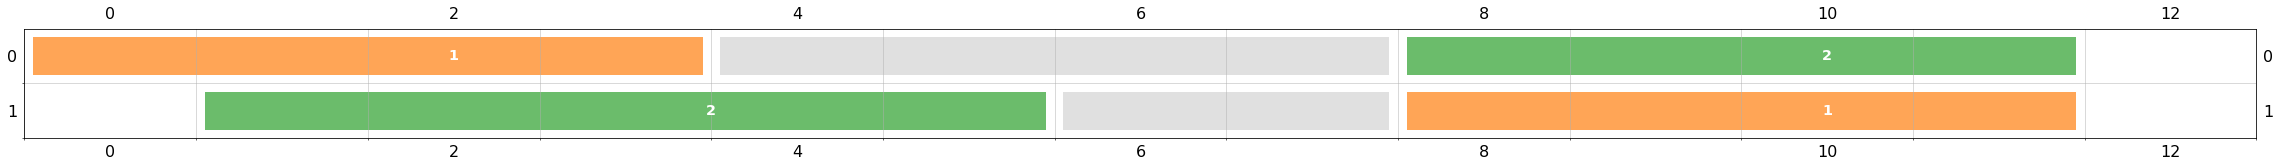

In [ ]:
shift_schedule = ShiftSchedule.from_file("test_data/sol1.csv")
plot_shift_schedule(shift_schedule)


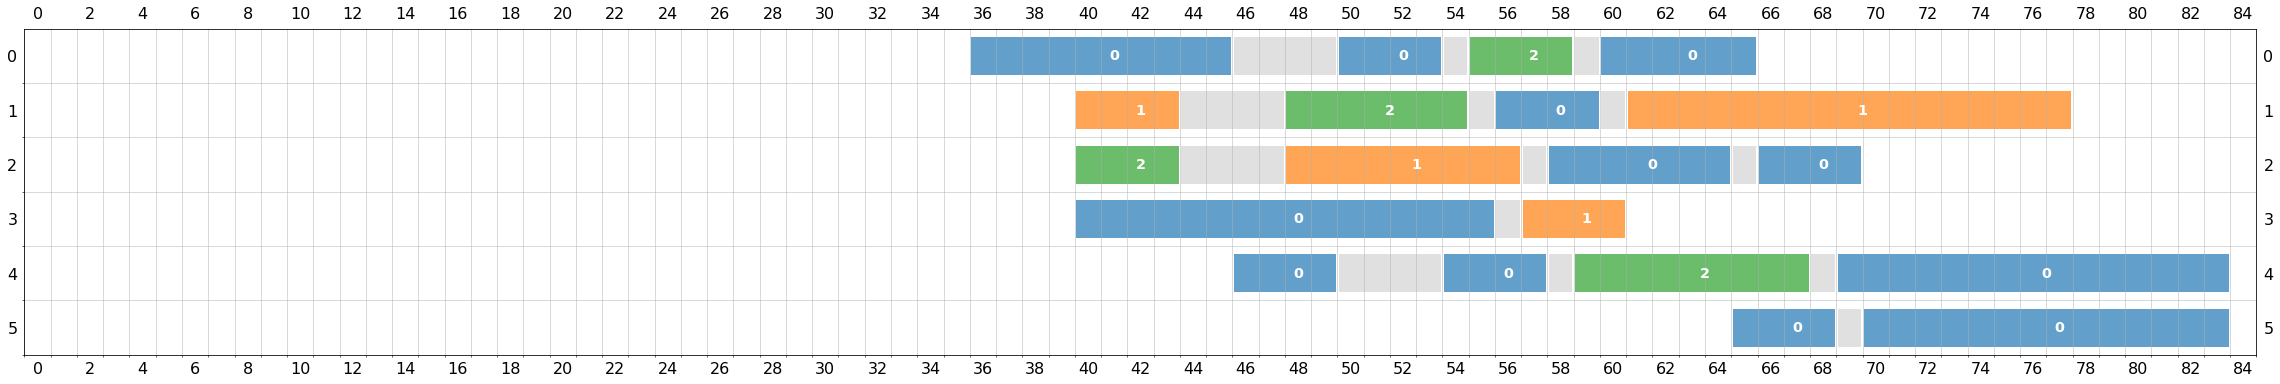

In [ ]:
shift_schedule = ShiftSchedule.from_file("test_data/shoe_1_3_1_9_sol.csv")

shift_schedule
plot_shift_schedule(shift_schedule)

### Demand and Demand Covering

Below, some demand plots. 

The main function is `plot_demands` which plots both aggregate and activity-level demand and, if given, also prints the covered demand.

The function uses the functions defined below.

**TODO:** Also for the demand line, it would be nice to have sth more interactive, e.g. based on Altair


The following function plots a demand line to a given ax.

In [ ]:
#export

def plot_demand_line(demand, color, ax,  cover = None):
    
    
    ax.step(range(len(demand)), demand, color=color, where='mid', linewidth=4)

    if cover is not None:        
        ax.bar(range(len(demand)), cover, width=1, color=color, align='center', alpha=0.7)
        
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
  

The following functions plot the aggregate demand and the detailed demand per activity.

In [ ]:
#export  

def plot_aggregate_demand(demand, cover):
    f = plt.figure(figsize=(40,2))
    
    number_of_periods = len(demand)
    
    suptitle= f.suptitle('Aggregate Demand', fontsize=24)
    suptitle.set_position([.5, 1.3])
    
    color = 'red'
    ax = f.add_subplot(111)
    
    ax.tick_params(axis="x", labelsize=14,bottom=False, labelbottom=True )
    ax.tick_params(axis="y", labelsize=14,left=False, labelleft=True, labelright=True)

    ax.set_xticks(np.arange(0, number_of_periods+0.1, 2))
    ax.set_xticks(np.arange(-0.5,number_of_periods+0.5,1),minor=True)
    
    ax.set_ylim(0,np.amax(demand) + 1)
    ax.set_ylabel('aggregate demand',fontsize=14)
    ax.set_xlim(-0.5,number_of_periods +0.5 )

    
    plot_demand_line(demand, color, ax, cover)

    
def plot_activity_demands(demands, covers=None):
    
    number_of_activities =  len(demands)
        
    f = plt.figure(figsize=(40,2*number_of_activities))
    
    suptitle = f.suptitle('Demand per Activity', fontsize=24)


    color_map = matplotlib.cm.get_cmap('tab10')
    
    for activity in range(number_of_activities):
        
        demand = demands[activity]
        
        number_of_periods = len(demand)
        
        if covers is None:
            cover = None
        else:
            cover = covers[activity]

        #this is the short way of describing axis index in matplotlib
        ax_index = number_of_activities * 100 +  11 + activity

        ax = f.add_subplot(ax_index)
    
       
        ax.set_ylim(0,np.amax(demands) + 1)
        ax.set_ylabel('act ' +str(activity), fontsize=14)
        ax.set_xlim(-0.5,number_of_periods+0.5 )
        
        ax.tick_params(axis="x", labelsize=14,bottom=False)
        ax.tick_params(axis="y", labelsize=14,left=False, labelleft=True, labelright=True)

        ax.set_xticks(np.arange(0, number_of_periods+0.1, 2))
        ax.set_xticks(np.arange(-0.5,number_of_periods+0.5,1),minor=True)

        
        plot_demand_line(demand, color_map(activity), ax, cover)
    

The following function is the main function using those from above.



In [ ]:
#export

def plot_demands(aggregate_demand, activity_demands = None,  aggregate_cover=None, activity_covers=None):
    
    if activity_demands:
        plot_activity_demands(activity_demands, activity_covers)
        
    plot_aggregate_demand(aggregate_demand, aggregate_cover)  
    
    if aggregate_cover is not None:
        plt.text(0, -5, "Note: Line corresponds to demand, colored area corresponds to cover", fontsize=16)
    
    


In [ ]:
#export
def plot_demands_for_instance(instance, shift_schedule = None):
    if shift_schedule is None:
        plot_demands(instance.get_aggregated_demand_per_period(), instance.get_activity_demands_per_period())
    else:
        plot_demands(instance.get_aggregated_demand_per_period(), instance.get_activity_demands_per_period(),  get_covered_aggregate_demand_per_period(shift_schedule, instance), get_covered_activity_demands_per_period(shift_schedule, instance))             

## Print full report

In [ ]:
#export
def instance_report(instance):
    display(Markdown(f'## Instance: {instance.instance_name}'))
    display(Markdown(instance.get_instance_information()))
    
    display(Markdown(f'## Demand:'))
    plot_demands_for_instance(instance)
    

In [ ]:
#export
def instance_solution_report(instance, rule_set, shift_schedule):
    display(Markdown(f'## Instance: {instance.instance_name}'))
    display(Markdown(instance.get_instance_information()))
    display_evaluation_results(evaluate_shift_schedule(shift_schedule, rule_set))
    display(Markdown(f'## Shift Schedule:'))
    plot_shift_schedule(shift_schedule, instance.number_of_periods)
    display(Markdown(f'## Demands and Cover'))
    plot_demands_for_instance(instance, shift_schedule)
    
    
    
    

## Exporting

In [ ]:


#hide
from nbdev.export import *
notebook2script()



Converted 00_data_stuctures.ipynb.
Converted 00_reporting.ipynb.
Converted 01_demassey.ipynb.
Converted 02_dahmen.ipynb.
Converted index.ipynb.
